# Actividad para evaluación de 3er parcial

Dado lo aprendido a lo largo del semestre durante la materia (python, grafos, interpretación y análisis de conectividad)

El 3er parcial se evaluará a través de la actividad:
__Aplicación y análisis a un dataset__

__Dataset a utilizar__: https://physionet.org/content/eegmmidb/1.0.0/S001/#files-panel

# Rúbrica para evaluación de 3er parcial

Se evaluará:
- Que el script no contenga errores
- Que los resultados del script sean reproducibles, ie que puedan ser reproducibles en cualquier computadora
- El orden del código
- La lógica del código
- La *inferencia* empleada para los parámetros utilizados, tales como thresholds para filtrado de matriz, elección de thresholds para selección de alguna banda específica (alfa, beta, delta, etc.) 
- Los métodos utilizados, ie, si para construir la matriz de conectividad se utilizó coherencia espectral, PLV o correlación, que haya una razón de ello
- Los resultados mostrados, tales como mapas de calor, grafos 2D, grafos 3D, el mostrar comunidades, hubs, nodos proporcionales al grado, filtrado de matriz de
- Conclusión del análisis, ie, al finalizar el análisis dar una conclusión que resuma los resultados encontrados con una interpretación de los mismos
- Que el análisis haya sido aplicado a cada uno de los ensayos/archivos del dataset

In [108]:
#Ensayo 3 y 4
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from mi_modulo import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [100]:
ensayo3_excel=r"C:\Users\mafig\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel=r"C:\Users\mafig\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
ensayo5_excel=r"C:\Users\mafig\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_05.xlsx"
ensayo6_excel=r"C:\Users\mafig\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_06.xlsx"

coordenadas_csv=r"C:\Users\mafig\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"
ensayo3_dict=pd.read_excel(ensayo3_excel,sheet_name=None, index_col=0)
ensayo4_dict=pd.read_excel(ensayo4_excel,sheet_name=None, index_col=0)
ensayo5_dict=pd.read_excel(ensayo5_excel,sheet_name=None, index_col=0)
ensayo6_dict=pd.read_excel(ensayo6_excel,sheet_name=None, index_col=0)


In [101]:
def lista_df(ensayo_dict): # lista de dataframes de los ensayos con cada sujeto
    ensayos_dfs_ = []
    for sujeto in ensayo_dict.keys():
        ensayos_dfs_.append(ensayo_dict[sujeto])
    return ensayos_dfs_

In [102]:
ensayos3_dfs= lista_df(ensayo3_dict)
ensayos4_dfs= lista_df(ensayo4_dict)
ensayos5_dfs= lista_df(ensayo5_dict)
ensayos6_dfs= lista_df(ensayo6_dict)

# Filtrado de matrices


In [16]:
threshold=0.5
porcentaje= 0.6
def  capsula(lista_dfs,th,porcentaje):
    #Conjuntamos las matrices
    stack=np.stack([df.values for df in lista_dfs])
    above= stack > th
    #Aplicamos filtro a cada matriz
    N= len(lista_dfs)
    count_above= above.sum(axis=0) #Contando cuantos valores superan el umbral en celda
    
    min_requerido= int(np.ceil(porcentaje*N)) 
    # con esto bastara con quedarnos con las celdas de 'above' que cumplan con miin_requerido
    # para así tener el número de sujetos que superan el umbral
    result_bool=count_above>= min_requerido
    result_df=pd.DataFrame(result_bool,
                           index=lista_dfs[0].index,
                          columns=lista_dfs[0].columns).astype(int)
    return result_df


In [103]:
resultado3_df=capsula(ensayos3_dfs,0.5,0.6)
resultado4_df=capsula(ensayos4_dfs,0.5,0.6)
resultado5_df=capsula(ensayos5_dfs,0.5,0.6)
resultado6_df=capsula(ensayos6_dfs,0.5,0.6)

## Generar estadísticos para decidir umbrales

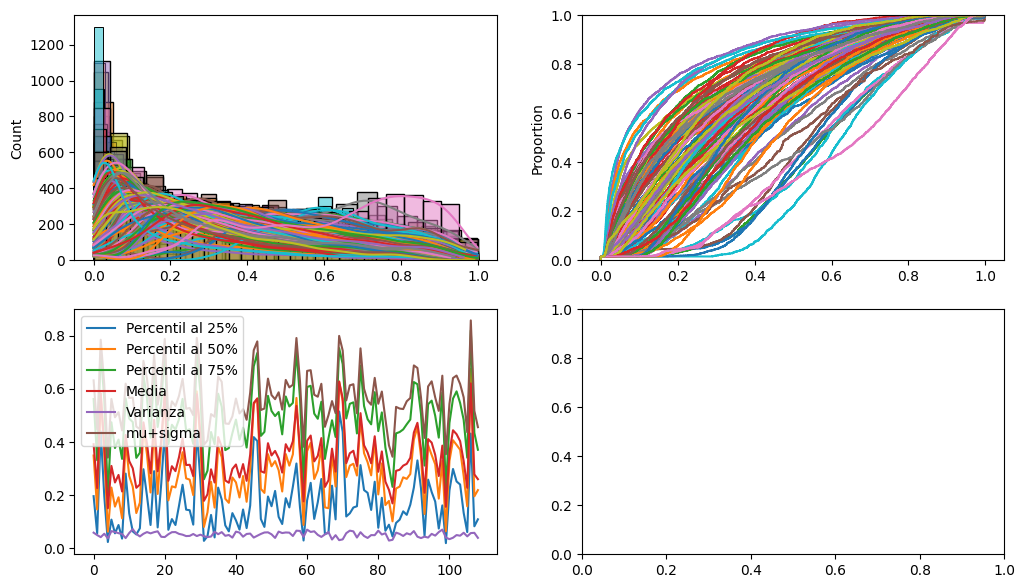

In [162]:
ensayos_dfs


def estats(ensayos_dfs):
    th25,th50,th75, promedio, varianza= [],[],[],[],[]
    mu_sigma=[]
    for sujeto in ensayos_dfs:
        #Cálculo de estadísticos
        data=sujeto.stack().values
        th25.append(np.percentile(data, 25))
        th50.append(np.percentile(data, 50))
        th75.append(np.percentile(data, 75))
        promedio.append(np.mean(data))
        varianza.append(np.var(data))
        mu_sigma.append(np.mean(data)+np.std(data))
    return th25, th50, th75, promedio, varianza, mu_sigma


fig, axes=plt.subplots(2,2, figsize=(12,7))
th25_, th50_, th75_, promedio_, varianza_, mu_sigma_=estats(ensayos3_dfs)
#Plots
for sujeto in ensayos3_dfs:
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
    
axes[1][0].plot(th25_,label='Percentil al 25%')
axes[1][0].plot(th50_,label='Percentil al 50%')
axes[1][0].plot(th75_,label='Percentil al 75%')
axes[1][0].plot(promedio_,label='Media')
axes[1][0].plot(varianza_,label='Varianza')
axes[1][0].plot(mu_sigma_,label='mu+sigma')
axes[1][0].legend()

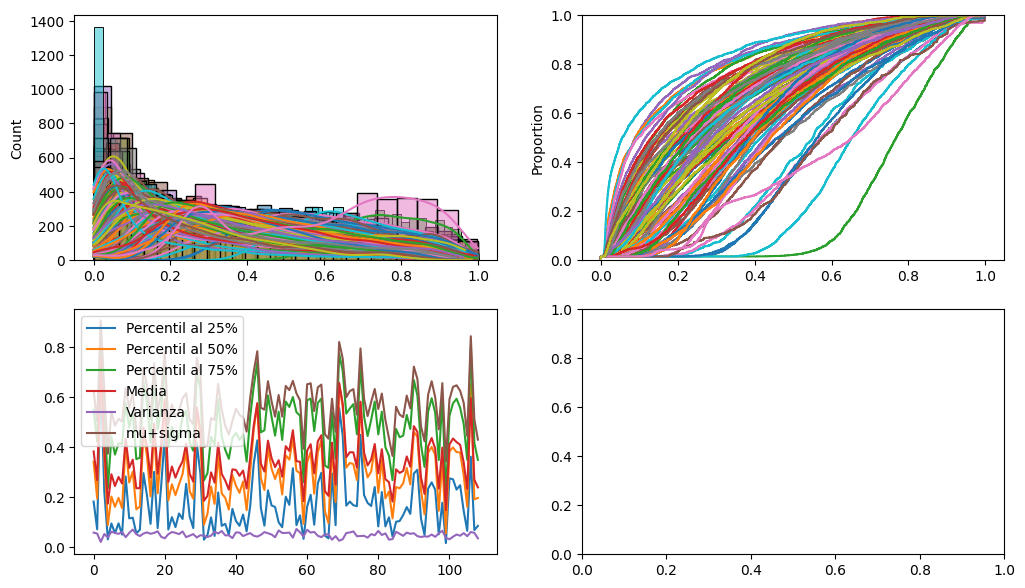

In [163]:
fig, axes=plt.subplots(2,2, figsize=(12,7))
th25_4, th50_4, th75_4, promedio_4, varianza_4, mu_sigma_4=estats(ensayos4_dfs)
#Plots
for sujeto in ensayos4_dfs:
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
    
axes[1][0].plot(th25_4,label='Percentil al 25%')
axes[1][0].plot(th50_4,label='Percentil al 50%')
axes[1][0].plot(th75_4,label='Percentil al 75%')
axes[1][0].plot(promedio_4,label='Media')
axes[1][0].plot(varianza_4,label='Varianza')
axes[1][0].plot(mu_sigma_4,label='mu+sigma')
axes[1][0].legend()

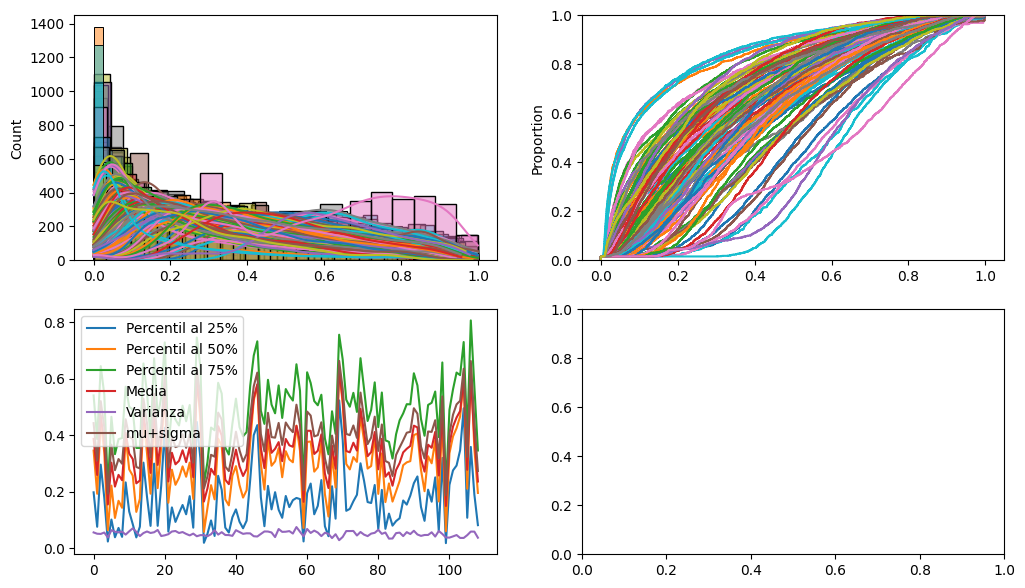

In [116]:
fig, axes=plt.subplots(2,2, figsize=(12,7))
th25_5, th50_5, th75_5, promedio_5, varianza_5, mu_sigma_5=estats(ensayos5_dfs)
#Plots
for sujeto in ensayos5_dfs:
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
    
axes[1][0].plot(th25_5,label='Percentil al 25%')
axes[1][0].plot(th50_5,label='Percentil al 50%')
axes[1][0].plot(th75_5,label='Percentil al 75%')
axes[1][0].plot(promedio_5,label='Media')
axes[1][0].plot(varianza_5,label='Varianza')
axes[1][0].plot(mu_sigma_5,label='mu+sigma')
axes[1][0].legend()

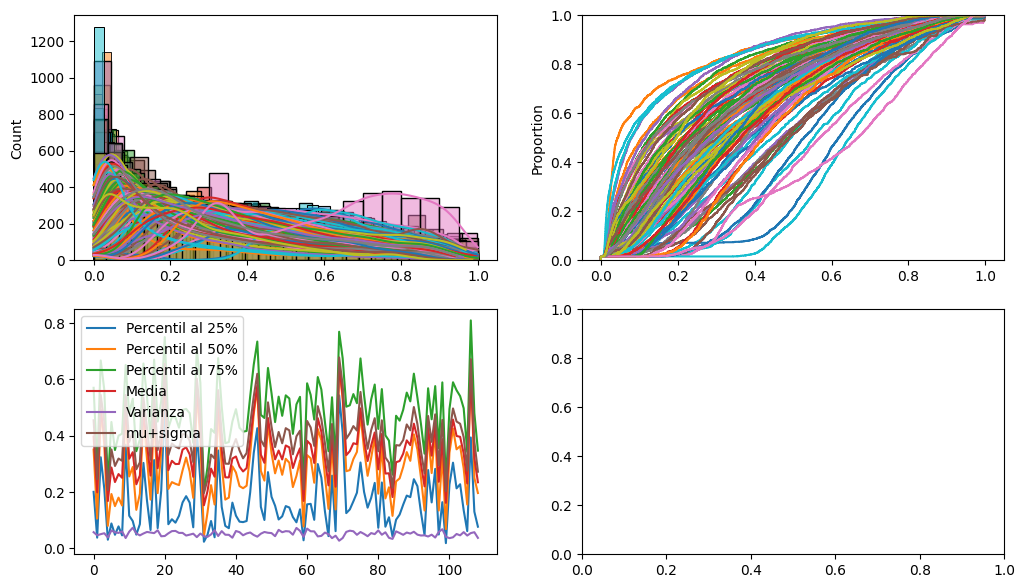

In [115]:
fig, axes=plt.subplots(2,2, figsize=(12,7))
th25_6, th50_6, th75_6, promedio_6, varianza_6, mu_sigma_6=estats(ensayos6_dfs)
#Plots
for sujeto in ensayos6_dfs:
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
    
axes[1][0].plot(th25_6,label='Percentil al 25%')
axes[1][0].plot(th50_6,label='Percentil al 50%')
axes[1][0].plot(th75_6,label='Percentil al 75%')
axes[1][0].plot(promedio_6,label='Media')
axes[1][0].plot(varianza_6,label='Varianza')
axes[1][0].plot(mu_sigma_6,label='mu+sigma')
axes[1][0].legend()

In [113]:
def estats_df(th25, th50, th75, promedio, mu_sigma):
    estadisticos_df=pd.DataFrame(np.zeros(4,5),columns=['th25','th50','th75','promedio','mu_sigma'],index=['min','max','mediana','mu_sigma'])
    columnas=[ th25, th50, th75, promedio, mu_sigma]
    for i in range(len(columnas)):
        estadisticos_df.iloc[0,i]= np.min(columnas[i])
        estadisticos_df.iloc[1,i]= np.max(columnas[i])
        estadisticos_df.iloc[2,i]= np.median(columnas[i])
        estadisticos_df.iloc[3,i]= np.mean(columnas[i])
    
    return estadisticos_df

In [119]:
estats_df(th25_, th50_, th75_, promedio_, mu_sigma_)

,th25,th50,th75,promedio,mu_sigma
min,0.018750,0.043536,0.202194,0.153129,0.196388
max,0.542689,0.667679,0.808475,0.649729,0.677091
mediana,0.144532,0.276807,0.493891,0.333420,0.389303
mu_sigma,0.164531,0.292742,0.490668,0.345590,0.397417


In [120]:
estats_df(th25_4, th50_4, th75_4, promedio_4, mu_sigma_4)

,th25,th50,th75,promedio,mu_sigma
min,0.016915,0.055561,0.210152,0.148728,0.186648
max,0.680820,0.768026,0.859416,0.758803,0.780441
mediana,0.135265,0.288254,0.480688,0.333706,0.384217
mu_sigma,0.171176,0.300271,0.495304,0.350497,0.401371


In [121]:
estats_df(th25_5, th50_5, th75_5, promedio_5, mu_sigma_5)

,th25,th50,th75,promedio,mu_sigma
min,0.017846,0.057751,0.205711,0.149197,0.187056
max,0.522739,0.651729,0.805549,0.634132,0.662407
mediana,0.152787,0.293580,0.500263,0.345151,0.399663
mu_sigma,0.170356,0.300673,0.496600,0.350631,0.402043


In [122]:
estats_df(th25_6, th50_6, th75_6, promedio_6, mu_sigma_6)

,th25,th50,th75,promedio,mu_sigma
min,0.018750,0.043536,0.202194,0.153129,0.196388
max,0.542689,0.667679,0.808475,0.649729,0.677091
mediana,0.144532,0.276807,0.493891,0.333420,0.389303
mu_sigma,0.164531,0.292742,0.490668,0.345590,0.397417


Text(0.5, 1.0, 'umbral=0.2, población>60%')

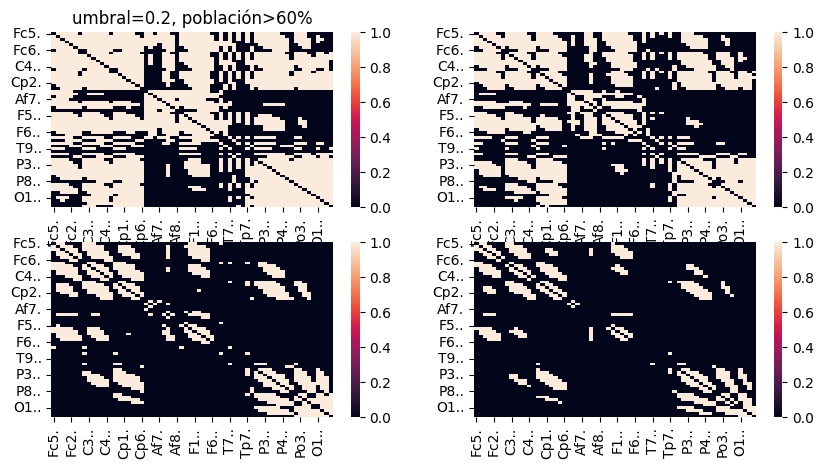

In [23]:
#umbrales a diferentes umbrales en el 60% de la población
result_df1=capsula(ensayos3_dfs,0.2,0.6)
result_df2=capsula(ensayos3_dfs,0.3,0.6)
result_df3=capsula(ensayos3_dfs,0.5,0.6)
result_df4=capsula(ensayos3_dfs,0.6,0.6)


fig,axes=plt.subplots(2,2,figsize=(10,5))

sns.heatmap(result_df1,ax=axes[0,0])
sns.heatmap(result_df2,ax=axes[0,1])
sns.heatmap(result_df3,ax=axes[1,0])
sns.heatmap(result_df4,ax=axes[1,1])

axes[0,0].set_title('umbral=0.2, población>60%')

Text(0.5, 1.0, 'umbral=0.3, población>50%')

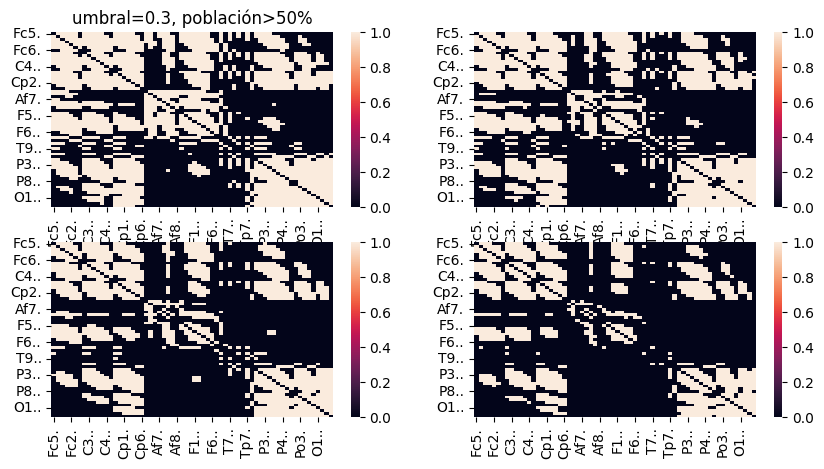

In [25]:
#Distintos porcentajes de población a un umbral
result_df1=capsula(ensayos_dfs,0.3,0.5)
result_df2=capsula(ensayos_dfs,0.3,0.6)
result_df3=capsula(ensayos_dfs,0.3,0.7)
result_df4=capsula(ensayos_dfs,0.3,0.8)


fig,axes=plt.subplots(2,2,figsize=(10,5))

sns.heatmap(result_df1,ax=axes[0,0])
sns.heatmap(result_df2,ax=axes[0,1])
sns.heatmap(result_df3,ax=axes[1,0])
sns.heatmap(result_df4,ax=axes[1,1])

axes[0,0].set_title('umbral=0.3, población>50%')

Text(0.5, 1.0, 'umbral=0.2, población>60%')

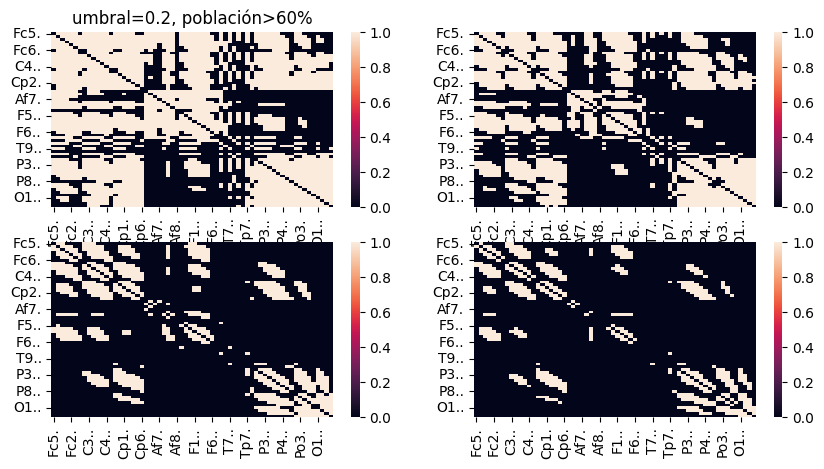

In [123]:
#umbrales a diferentes umbrales en el 60% de la población(ensayo4)
result_df1=capsula(ensayos4_dfs,0.2,0.6)
result_df2=capsula(ensayos4_dfs,0.3,0.6)
result_df3=capsula(ensayos4_dfs,0.5,0.6)
result_df4=capsula(ensayos4_dfs,0.6,0.6)


fig,axes=plt.subplots(2,2,figsize=(10,5))

sns.heatmap(result_df1,ax=axes[0,0])
sns.heatmap(result_df2,ax=axes[0,1])
sns.heatmap(result_df3,ax=axes[1,0])
sns.heatmap(result_df4,ax=axes[1,1])

axes[0,0].set_title('umbral=0.2, población>60%')

Text(0.5, 1.0, 'umbral=0.3, población>50%')

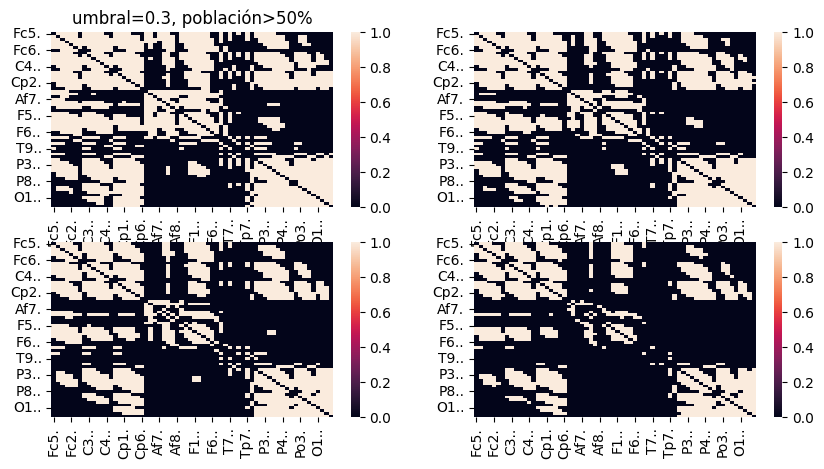

In [124]:
#Distintos porcentajes de población a un umbral(ensayo4)
result_df1=capsula(ensayos4_dfs,0.3,0.5)
result_df2=capsula(ensayos4_dfs,0.3,0.6)
result_df3=capsula(ensayos4_dfs,0.3,0.7)
result_df4=capsula(ensayos4_dfs,0.3,0.8)


fig,axes=plt.subplots(2,2,figsize=(10,5))

sns.heatmap(result_df1,ax=axes[0,0])
sns.heatmap(result_df2,ax=axes[0,1])
sns.heatmap(result_df3,ax=axes[1,0])
sns.heatmap(result_df4,ax=axes[1,1])

axes[0,0].set_title('umbral=0.3, población>50%')

Text(0.5, 1.0, 'umbral=0.2, población>60%')

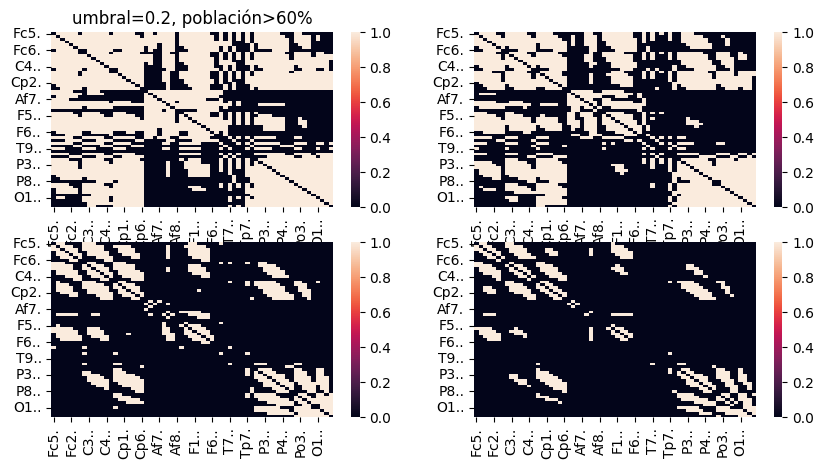

In [128]:
#umbrales a diferentes umbrales en el 60% de la población(ensayo5)
result_df1=capsula(ensayos5_dfs,0.2,0.6)
result_df2=capsula(ensayos5_dfs,0.3,0.6)
result_df3=capsula(ensayos5_dfs,0.5,0.6)
result_df4=capsula(ensayos5_dfs,0.6,0.6)


fig,axes=plt.subplots(2,2,figsize=(10,5))

sns.heatmap(result_df1,ax=axes[0,0])
sns.heatmap(result_df2,ax=axes[0,1])
sns.heatmap(result_df3,ax=axes[1,0])
sns.heatmap(result_df4,ax=axes[1,1])

axes[0,0].set_title('umbral=0.2, población>60%')

Text(0.5, 1.0, 'umbral=0.3, población>50%')

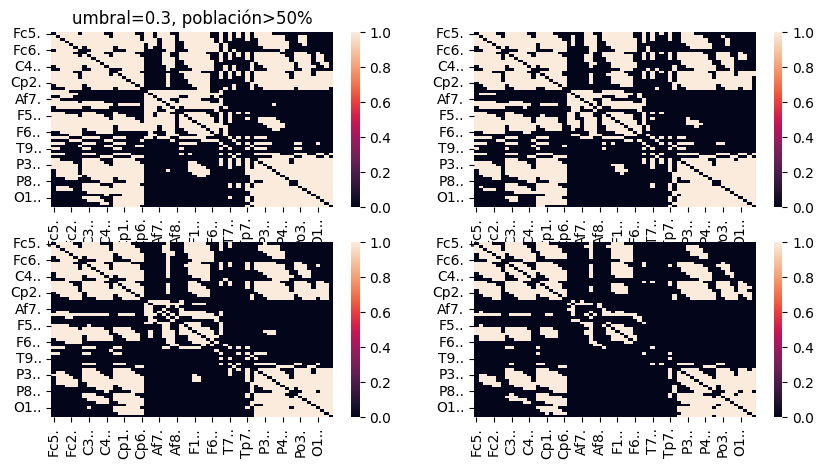

In [127]:
#Distintos porcentajes de población a un umbral(ensayo5)
result_df1=capsula(ensayos5_dfs,0.3,0.5)
result_df2=capsula(ensayos5_dfs,0.3,0.6)
result_df3=capsula(ensayos5_dfs,0.3,0.7)
result_df4=capsula(ensayos5_dfs,0.3,0.8)


fig,axes=plt.subplots(2,2,figsize=(10,5))

sns.heatmap(result_df1,ax=axes[0,0])
sns.heatmap(result_df2,ax=axes[0,1])
sns.heatmap(result_df3,ax=axes[1,0])
sns.heatmap(result_df4,ax=axes[1,1])

axes[0,0].set_title('umbral=0.3, población>50%')

Text(0.5, 1.0, 'umbral=0.2, población>60%')

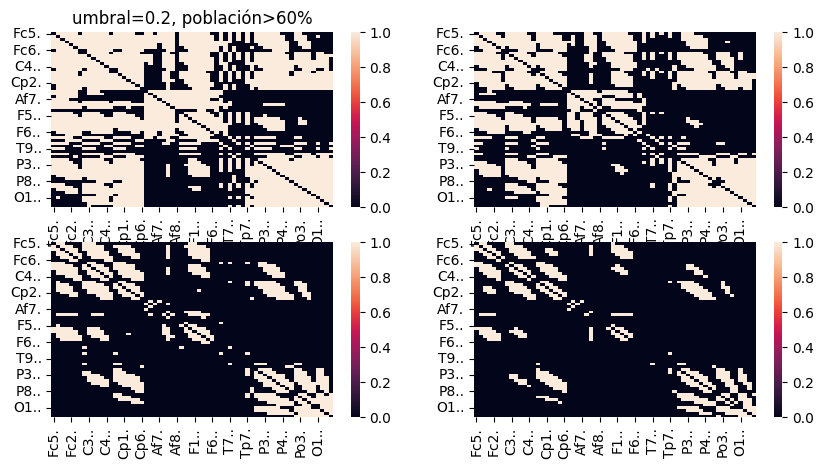

In [126]:
#umbrales a diferentes umbrales en el 60% de la población(ensayo6)
result_df1=capsula(ensayos6_dfs,0.2,0.6)
result_df2=capsula(ensayos6_dfs,0.3,0.6)
result_df3=capsula(ensayos6_dfs,0.5,0.6)
result_df4=capsula(ensayos6_dfs,0.6,0.6)


fig,axes=plt.subplots(2,2,figsize=(10,5))

sns.heatmap(result_df1,ax=axes[0,0])
sns.heatmap(result_df2,ax=axes[0,1])
sns.heatmap(result_df3,ax=axes[1,0])
sns.heatmap(result_df4,ax=axes[1,1])

axes[0,0].set_title('umbral=0.2, población>60%')

Text(0.5, 1.0, 'umbral=0.3, población>50%')

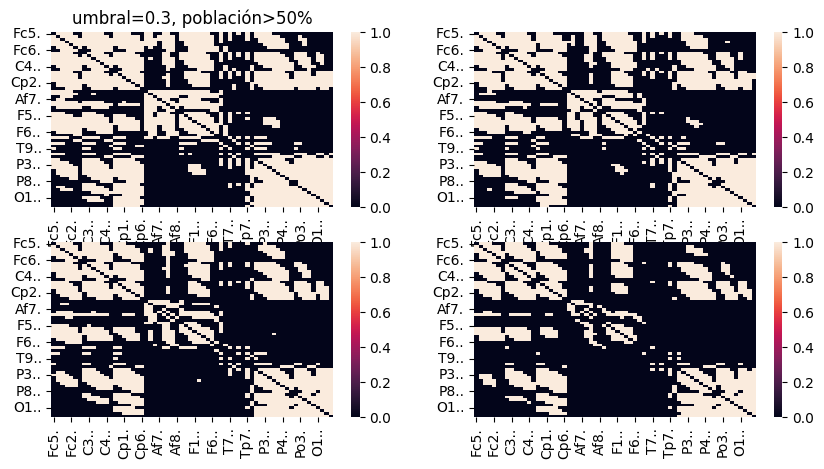

In [125]:
#Distintos porcentajes de población a un umbral(ensayo6)
result_df1=capsula(ensayos6_dfs,0.3,0.5)
result_df2=capsula(ensayos6_dfs,0.3,0.6)
result_df3=capsula(ensayos6_dfs,0.3,0.7)
result_df4=capsula(ensayos6_dfs,0.3,0.8)


fig,axes=plt.subplots(2,2,figsize=(10,5))

sns.heatmap(result_df1,ax=axes[0,0])
sns.heatmap(result_df2,ax=axes[0,1])
sns.heatmap(result_df3,ax=axes[1,0])
sns.heatmap(result_df4,ax=axes[1,1])

axes[0,0].set_title('umbral=0.3, población>50%')

# Generación de resultados
Despues del analisis realizado, utilizando los mapas de calor, para poder escoger un threshold adecaudo y un porcentaje de la población que cumpla dicho umbral; se procederá a generar los resultados

Resultados a generar:
- Grafo2D
- Grafo3D
- Métricas de l grafi
- Gráfico de comunidades con hub

In [133]:
#convertir de dataframe a grafo
ensayo3_grafo_=nx.from_pandas_adjacency(capsula(ensayos3_dfs,0.3,0.7))
ensayo4_grafo_=nx.from_pandas_adjacency(capsula(ensayos4_dfs,0.3,0.7))
ensayo5_grafo_=nx.from_pandas_adjacency(capsula(ensayos5_dfs,0.3,0.7))
ensayo6_grafo_=nx.from_pandas_adjacency(capsula(ensayos6_dfs,0.3,0.7))



In [130]:
# Grafo 2
def grafo2D(df,pos):
    ensayo_grafo=nx.from_pandas_adjacency(df)
    nx.draw_circular(ensayo_grafo, with_labels=True,ax=pos)

    return ensayo_grafo

In [138]:
def metricas_grafo(G):
    #Metricas:
    # Cluster promedio
    clust_coeff= nx.average_clustering(G)
    # Longitud de camino promedio(camino más corto)
    # (b) Longitud de camino promedio (camino más corto)
    try:
        path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        path_length = np.nan  # red no conexa
    # Mundo pequeño
    # Comparar con grafo aleaatorio de igual N,K
    G_rand=nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges())
    clust_rand= nx.average_clustering(G_rand)
    path_rand= nx.average_shortest_path_length(G_rand)
    small_world_sigma= (clust_coeff/clust_rand)/(path_length/path_rand)
    #Modularidad
    # (d) Modularidad — usando método de comunidades
    from networkx.algorithms import community
    communities = community.greedy_modularity_communities(G)
    modularity = community.modularity(G, communities)
    
    # (e) Hubs — grado, centralidad de intermediación
    degree_dict = dict(G.degree())
    betweenness = nx.betweenness_centrality(G)
    betwenness= sorted(betweenness.items(),key=lambda x: x[1],reverse=True)
    
    # (f) Eficiencia global y local
    global_eff = nx.global_efficiency(G)
    local_eff = nx.local_efficiency(G)

    return (clust_coeff, path_length,small_world_sigma,communities,modularity,betwenness,global_eff,local_eff,degree_dict)

In [34]:
(clust_coeff_, path_length_,small_world_sigma_,communities_,modularity_,betwenness_,global_eff_,local_eff_,degree_dict_)=metricas_grafo(ensayo_grafo)

In [131]:
#Construcción de dataframe de coordenadas
eeg_coords=pd.read_csv(coordenadas_csv)
eeg_coords.set_index('canal',drop=True, inplace=True)

In [ ]:
eeg_coords.loc['Fc5.','y']

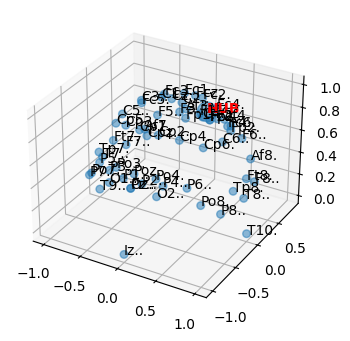

In [59]:


def grafo3D(coords,Hub,pos):
    x, y, z = coords['x'].values, coords['y'].values, coords['z'].values
    nodes_size = [30 if idx != Hub[0] else 200 for idx in coords.index]
    pos.scatter(x, y, z, alpha=0.5, s=nodes_size)
    for idx, (x_, y_, z_) in enumerate(zip(x, y, z)):
        pos.text(x_, y_, z_, coords.index[idx], fontsize=10)
        if coords.index[idx] == Hub[0]:
            pos.text(x_, y_, z_, 'HUB', color='red', fontweight='bold', fontsize=10)





In [47]:
# Grafo de comunidades
comunidad_prueba= communities_[2]
#n1, n2 =list(comunidad_prueba)[0],list(comunidad_prueba)[1]

In [141]:

hub = betwenness_[0]
def grafo_comunidades(comunidades,Hub,coords,pos,num):
    x, y, z = coords['x'].values, coords['y'].values, coords['z'].values
    
    nodes_size = [30 if idx != Hub[0] else 200 for idx in coords.index]
    pos.scatter(x, y, z, alpha=0.5, s=nodes_size)
    for idx, (x_, y_, z_) in enumerate(zip(x, y, z)):
        pos.text(x_, y_, z_, coords.index[idx], fontsize=10)
        if coords.index[idx] == Hub[0]:
            pos.text(x_, y_, z_, 'HUB', color='red', fontweight='bold', fontsize=10)
    
    colores=['red','green','blue','black','orange']
    for n_comunidad,comunidad in enumerate(comunidades):
        for idx in range(len(comunidad)-1):
            n1,n2= list(comunidad)[idx], list(comunidad)[idx+1]
            x_=[coords.loc[n1,'x'],coords.loc[n2,'x']]
            y_=[coords.loc[n1,'y'],coords.loc[n2,'y']]
            z_=[coords.loc[n1,'z'],coords.loc[n2,'z']]
            pos.plot(x_,y_,z_, linewidth=3,alpha=0.4, color=colores[n_comunidad])
    pos.set_title(f'comunidades ensayo {num}')



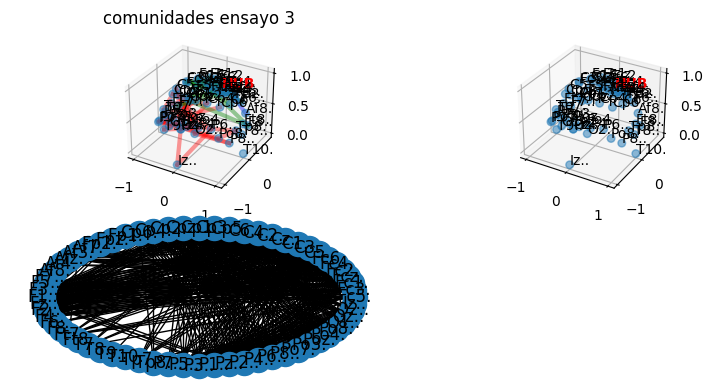

In [69]:
#Ensayo 3
hub=betwenness_[0]

fig=plt.figure(figsize=(8,4))
axes= [fig.add_subplot(2,2,1,projection='3d'),
      fig.add_subplot(2,2,2,projection='3d'),
      fig.add_subplot(2,2,3)]

grafo3D(eeg_coords,hub,axes[1])
grafo_comunidades(communities_,hub,eeg_coords,axes[0],3)
ensayo_grafo=grafo2D(result_df3,axes[2])
plt.tight_layout()


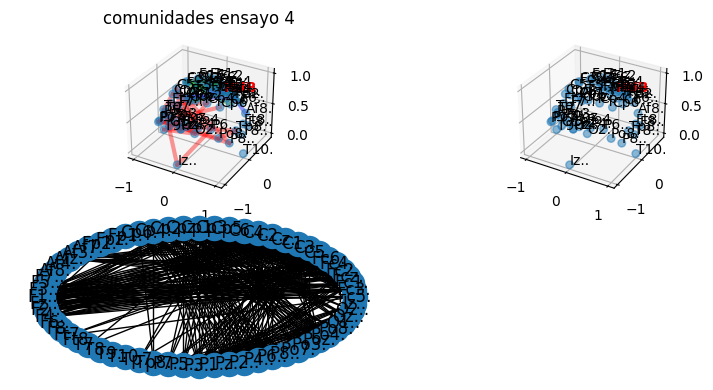

In [166]:
#Ensayo4

fig=plt.figure(figsize=(8,4))
axes= [fig.add_subplot(2,2,1,projection='3d'),
      fig.add_subplot(2,2,2,projection='3d'),
      fig.add_subplot(2,2,3)]

ensayo4_grafo=grafo2D(capsula(ensayos4_dfs,0.38,0.7),axes[2])
(clust_coeff_, path_length_,small_world_sigma_,communities_,modularity_,betwenness_,global_eff_,local_eff_,degree_dict_)=metricas_grafo(ensayo4_grafo)
hub=betwenness_[0]
grafo3D(eeg_coords,hub,axes[1])
grafo_comunidades(communities_,hub,eeg_coords,axes[0],4)

plt.tight_layout()

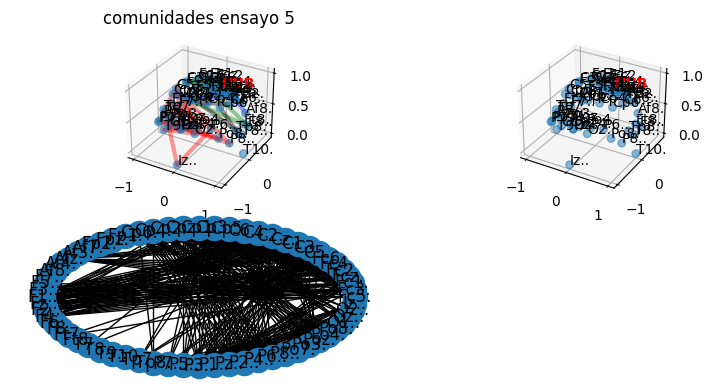

In [165]:
#Ensayo5

fig=plt.figure(figsize=(8,4))
axes= [fig.add_subplot(2,2,1,projection='3d'),
      fig.add_subplot(2,2,2,projection='3d'),
      fig.add_subplot(2,2,3)]

ensayo5_grafo=grafo2D(capsula(ensayos5_dfs,0.39,0.7),axes[2])
(clust_coeff_, path_length_,small_world_sigma_,communities_,modularity_,betwenness_,global_eff_,local_eff_,degree_dict_)=metricas_grafo(ensayo5_grafo)
hub=betwenness_[0]
grafo3D(eeg_coords,hub,axes[1])
grafo_comunidades(communities_,hub,eeg_coords,axes[0],5)

plt.tight_layout()

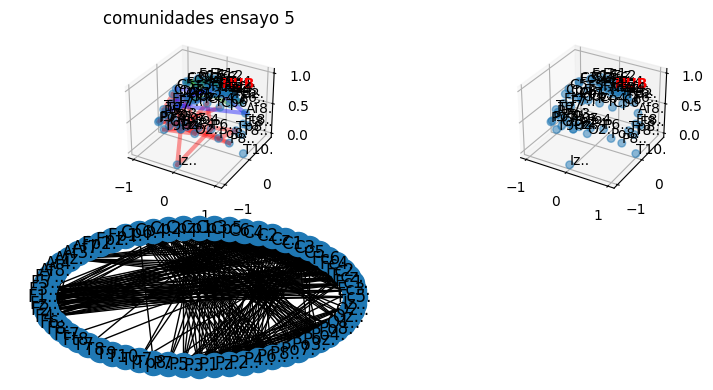

In [164]:
#Ensayo 6
fig=plt.figure(figsize=(8,4))
axes= [fig.add_subplot(2,2,1,projection='3d'),
      fig.add_subplot(2,2,2,projection='3d'),
      fig.add_subplot(2,2,3)]

ensayo6_grafo=grafo2D(capsula(ensayos6_dfs,0.4,0.7),axes[2])
(clust_coeff_, path_length_,small_world_sigma_,communities_,modularity_,betwenness_,global_eff_,local_eff_,degree_dict_)=metricas_grafo(ensayo6_grafo)
hub=betwenness_[0]
grafo3D(eeg_coords,hub,axes[1])
grafo_comunidades(communities_,hub,eeg_coords,axes[0],5)

plt.tight_layout()

# 
Leer datos
generar listas de dataframes
compactar a 1 dataframe
- hacer analisis sobre umbrales por ensayo
analizamos resultado con mapa de calor
observamos resultado en grafo 2D
observamos resultado cen grafo 3D

Conocimiento previo
Analísis de literatura
Lógica

Debido a que las diferencias de los valores de th25,50,75, promedio y varianza son muy pequeñas entre los diferentes ensayos. Se va a considderar un threshold del percentil 75/mu+sigma por que es menos disperso entre sujetos de cada grupo al 70& de la población para que las leves diferencias que se presentane entre ensayos sea más notable en los resultados.
Ensayo 3: Abrir y cerrar el puño, ya sea izquierdo o derecho, dependiendo del estímulo mostrado.
Ensayo 4: Imagina abrir o cerrar el puño correspondiente.
Ensayo 5: Abrir y cerrar ambos puños o ambos pies.
Ensayo 6: Imagina abrir y cerrar ambos puños o ambos pies.